In [1]:
#Srinivasan Subramaniyan
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
import numpy as np
import random

def epislongreedy(Q, epsilon):
    flip = random.random()
    if flip < 1 - epsilon:
        action = np.argmax(Q) + 1
    else:
        action = np.random.randint(1, 5)
    return action

def stateaction(S, A):
    a = -1
    if S > 48:
        next_state = 1
        a = -1
    elif S ==45:
        next_state = 1
        a = -1
    elif S in [5, 9, 13, 17, 21, 25, 29, 33, 37, 41]:   #cliff 
        next_state = 1
        a = -100
    elif A == 1:  # Up
        if S % 4 == 0:
            next_state = S
        else:
            next_state = S + 1
    elif A == 2:  # Down
        if S != 1:
            next_state = S - 1
        else:
            next_state = S
    elif A == 3:  # Left
        if S <= 4:
            next_state = S
        else:
            next_state = S - 4
    elif A == 4:  # Right
        if S > 45:
            next_state = S
        else:
            next_state = S + 4
    return next_state, a

#SARSA

def sarsa(epsilon,episodes,games,win,alpha,gamma):
    Q = np.zeros([48, 4])
    games_sarsa=np.zeros([games,episodes])
    for game in range(games):
        sum_rewards = np.zeros(episodes)
        for i in range(episodes):
            current_state = 1
            action = epislongreedy(Q[current_state - 1, :], epsilon) 
            while current_state != win:
                next_state, reward = stateaction(current_state, action)
                next_action = epislongreedy(Q[next_state - 1, :], epsilon) 
                Q[current_state - 1][action - 1] = (1 - alpha) * Q[current_state - 1][action - 1] + alpha * (reward + gamma * Q[next_state - 1][next_action - 1]) 
                current_state = next_state
                action = next_action
                sum_rewards[i] += reward
        games_sarsa[game,:]=sum_rewards
    
    return games_sarsa

#Qlearning

def Qlearn(epsilon,episodes,games,win,alpha,gamma):
    Q = np.zeros([48, 4])
    games_qlearning=np.zeros([games,episodes])
    for game in range(games):
        sum_rewards = np.zeros(episodes)
        for i in range(episodes):
            current_state = 1
            while current_state != win:
                action = epislongreedy(Q[current_state - 1, :], epsilon) 
                next_state, reward = stateaction(current_state, action)
                Q[current_state - 1][action - 1] = (1 - alpha) * Q[current_state - 1][action - 1] + alpha * (reward + gamma * np.max(Q[next_state - 1][:])) 
                current_state = next_state
                sum_rewards[i] += reward
        games_qlearning[game,:]=sum_rewards
    
    return games_qlearning


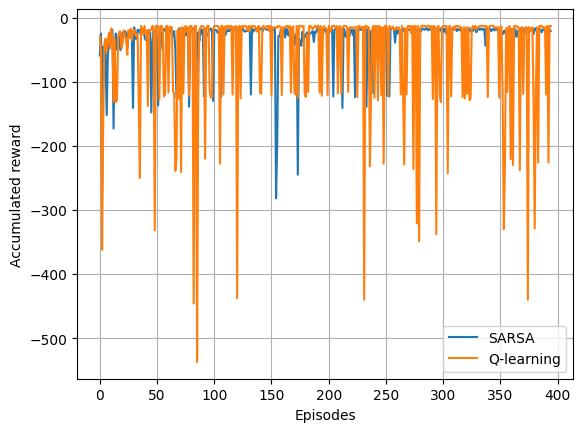

In [3]:
epsilon = 0.1
gamma = 1
episodes = 400
games = 1
win = 45
alpha = 0.5
games_sarsa=sarsa(epsilon,episodes,games,win,alpha,gamma)
games_qlearning=Qlearn(epsilon,episodes,games,win,alpha,gamma)
fig,ax=plt.subplots()
plt.plot((games_sarsa[0,5:]),label='SARSA')
plt.plot((games_qlearning[0,5:]),label='Q-learning')
plt.grid()
plt.ylabel('Accumulated reward')
plt.xlabel('Episodes')
plt.legend()


In [4]:
epsilon = 0.1
gamma = 1
episodes = 400
games = 400
win = 45
alpha = 0.5
games_sarsa=sarsa(epsilon,episodes,games,win,alpha,gamma)
games_qlearning=Qlearn(epsilon,episodes,games,win,alpha,gamma)
    

(-90.0, -20.0)

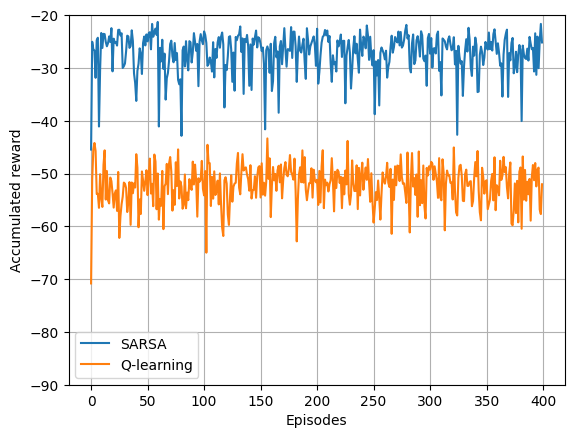

In [5]:
fig,ax=plt.subplots()
plt.plot(np.mean(games_sarsa[:,:], axis=1),label='SARSA')
plt.plot(np.mean(games_qlearning[:,:], axis=1),label='Q-learning')
plt.grid()
plt.ylabel('Accumulated reward')
plt.xlabel('Episodes')
plt.legend()
plt.ylim([-90,-20])
